In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import interact, interact_manual
plt.style.use('fivethirtyeight')

In [2]:
matches = pd.read_csv('matches+-+matches.csv')
matches.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
matches.shape, matches.columns

((756, 18),
 Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
        'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
        'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
        'umpire3'],
       dtype='object'))

In [4]:
print('Cities:', matches.city.nunique())
print('Venues:', matches.venue.nunique())
print('Seasons:', matches.Season.nunique())
print('Teams:', matches.team1.nunique())

Cities: 32
Venues: 41
Seasons: 12
Teams: 15


In [5]:
cities = set(matches.city.unique())
print(cities)

{'Bloemfontein', 'Chennai', 'Mohali', 'Chandigarh', 'Bengaluru', 'Sharjah', 'Kochi', 'Hyderabad', 'Delhi', 'Jaipur', 'Centurion', 'Raipur', 'Kanpur', 'Indore', 'Ranchi', 'Nagpur', 'East London', 'Visakhapatnam', 'Dharamsala', 'Kolkata', 'Port Elizabeth', 'Cuttack', 'Pune', 'Abu Dhabi', 'Rajkot', 'Mumbai', 'Durban', 'Ahmedabad', 'Bangalore', 'Cape Town', 'Kimberley', nan, 'Johannesburg'}


In [6]:
matches.city.isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
751    False
752    False
753    False
754    False
755    False
Name: city, Length: 756, dtype: bool

In [7]:
matches.city = matches.city.replace('Bangalore', 'Bengaluru')
cities = set(matches.city.unique())
print(cities)

{'Bloemfontein', 'Chennai', 'Mohali', 'Chandigarh', 'Bengaluru', 'Sharjah', 'Kochi', 'Hyderabad', 'Delhi', 'Jaipur', 'Centurion', 'Raipur', 'Kanpur', 'Indore', 'Ranchi', 'Nagpur', 'East London', 'Visakhapatnam', 'Dharamsala', 'Kolkata', 'Port Elizabeth', 'Cuttack', 'Pune', 'Abu Dhabi', 'Rajkot', 'Mumbai', 'Durban', 'Ahmedabad', 'Cape Town', 'Kimberley', nan, 'Johannesburg'}


In [8]:
u1 = set(matches.umpire1.unique())
u2 = set(matches.umpire2.unique())
u3 = set(matches.umpire3.unique())

u1 = u1.intersection(u2)
u2 = u1.intersection(u3)

print(f'{len(u2)} umpires in all matches: {u2}')

20 umpires in all matches: {'Nigel Llong', 'Kumar Dharmasena', 'Rod Tucker', 'Chris Gaffaney', 'O Nandan', 'Anil Dandekar', 'A Nanda Kishore', 'Ulhas Gandhe', 'Nanda Kishore', 'C Shamshuddin', 'Ian Gould', 'Vineet Kulkarni', 'K Ananthapadmanabhan', 'Yeshwant Barde', 'Anil Chaudhary', 'Nitin Menon', 'Bruce Oxenford', 'S Ravi', 'KN Ananthapadmanabhan', nan}


In [9]:
matches[matches.umpire1.isnull() & matches.umpire2.isnull() & matches.umpire3.isnull()]

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
4,5,IPL-2017,Bengaluru,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN


In [10]:
len(matches.player_of_match.notnull())

756

In [11]:
matches.shape

(756, 18)

In [12]:
len(matches.player_of_match.notnull().unique())

2

In [13]:
matches.player_of_match.notnull().unique()

array([ True, False])

In [14]:
matches[matches.player_of_match.notnull() == True].shape
matches[matches.player_of_match.notnull() == True].shape

(752, 18)

In [15]:
print(len((matches[matches.player_of_match.notnull() == True].player_of_match.unique())))
matches[matches.player_of_match.notnull() == True].player_of_match.value_counts()

226


CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
                  ..
PD Collingwood     1
NV Ojha            1
AC Voges           1
J Theron           1
S Hetmyer          1
Name: player_of_match, Length: 226, dtype: int64

In [16]:
matches[matches.player_of_match=='CH Gayle']

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
19,20,IPL-2017,Rajkot,18-04-2017,Royal Challengers Bangalore,Gujarat Lions,Gujarat Lions,field,normal,0,Royal Challengers Bangalore,21,0,CH Gayle,Saurashtra Cricket Association Stadium,S Ravi,VK Sharma,NaN
122,123,IPL-2009,Durban,21-04-2009,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,1,Kolkata Knight Riders,11,0,CH Gayle,Kingsmead,DJ Harper,SD Ranade,NaN
257,258,IPL-2011,Kolkata,22-04-2011,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,9,CH Gayle,Eden Gardens,SS Hazare,RB Tiffin,NaN
279,280,IPL-2011,Bengaluru,06-05-2011,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Royal Challengers Bangalore,85,0,CH Gayle,M Chinnaswamy Stadium,Aleem Dar,RB Tiffin,NaN
282,283,IPL-2011,Bengaluru,08-05-2011,Kochi Tuskers Kerala,Royal Challengers Bangalore,Kochi Tuskers Kerala,bat,normal,0,Royal Challengers Bangalore,0,9,CH Gayle,M Chinnaswamy Stadium,Aleem Dar,SS Hazare,NaN
290,291,IPL-2011,Bengaluru,14-05-2011,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,1,Royal Challengers Bangalore,0,4,CH Gayle,M Chinnaswamy Stadium,RE Koertzen,RB Tiffin,NaN
301,302,IPL-2011,Bengaluru,22-05-2011,Chennai Super Kings,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,8,CH Gayle,M Chinnaswamy Stadium,K Hariharan,RE Koertzen,NaN
305,306,IPL-2011,Chennai,27-05-2011,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,normal,0,Royal Challengers Bangalore,43,0,CH Gayle,"MA Chidambaram Stadium, Chepauk",Asad Rauf,SJA Taufel,NaN
328,329,IPL-2012,Bengaluru,17-04-2012,Pune Warriors,Royal Challengers Bangalore,Pune Warriors,bat,normal,0,Royal Challengers Bangalore,0,6,CH Gayle,M Chinnaswamy Stadium,S Asnani,S Das,NaN
332,333,IPL-2012,Chandigarh,20-04-2012,Kings XI Punjab,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,5,CH Gayle,"Punjab Cricket Association Stadium, Mohali",S Ravi,RJ Tucker,NaN


In [25]:
#As It is clear that from the Season IPL-2018 Gayle played for Kings XI Punjab, #lets analyze and Compare Kings XI Punjab and RCB After CH Gayle

after_gayle = matches[(matches['Season'] == 'IPL-2018') | (matches['Season'] == 'IPL-2019')] 
after_gayle_rcb= after_gayle[(after_gayle['winner']== 'Royal Challengers Bangalore') | (after_gayle['winner'] == 'Kings XI Punjab')]

print("Number of Matches Won")                               
print (after_gayle_rcb['winner'].value_counts())
print("\nwin by Total Runs and wickets") 
print (after_gayle_rcb[['win_by_runs', 'win_by_wickets', 'winner']].groupby('winner').sum())


Number of Matches Won
Kings XI Punjab                12
Royal Challengers Bangalore    11
Name: winner, dtype: int64

win by Total Runs and wickets
                             win_by_runs  win_by_wickets
winner                                                  
Kings XI Punjab                       63              41
Royal Challengers Bangalore           56              37


In [31]:
#total matches between KXIP and RCB after 2018

37

matches_won_rcb= matches[(matches['Season'] == 'IPL-2018') | (matches['Season'] == 'IPL-2019')] 
matches_won_rcb= matches_won_rcb[((matches_won_rcb['team1']== 'Royal Challengers Bangalore') & 
                                   (matches_won_rcb['team2']== 'Kings XI Punjab')) |
                                   ((matches_won_rcb['team1']== 'Kings XI Punjab') & 
                                   (matches_won_rcb['team2']== 'Royal Challengers Bangalore'))]

matches_won_rcb[[ 'Season', 'team1', 'team2', 'winner']]

,Season,team1,team2,winner
643,IPL-2018,Kings XI Punjab,Royal Challengers Bangalore,Royal Challengers Bangalore
683,IPL-2018,Kings XI Punjab,Royal Challengers Bangalore,Royal Challengers Bangalore
723,IPL-2019,Kings XI Punjab,Royal Challengers Bangalore,Royal Challengers Bangalore
737,IPL-2019,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore


In [34]:
#Lets check all the Player of the Matches per season and per Team

@interact

def best_players (season = list(matches['Season'].value_counts().index),team =  list(matches['team1'].value_counts().index)):
    a = matches[(matches['Season'] == season) & (matches['team1'] == team)] 
    return a ['player_of_match'].value_counts()

interactive(children=(Dropdown(description='season', options=('IPL-2013', 'IPL-2012', 'IPL-2011', 'IPL-2010', …

       win_by_runs  win_by_wickets
count   756.000000      756.000000
mean     13.283069        3.350529
std      23.471144        3.387963
min       0.000000        0.000000
25%       0.000000        0.000000
50%       0.000000        4.000000
75%      19.000000        6.000000
max     146.000000       10.000000


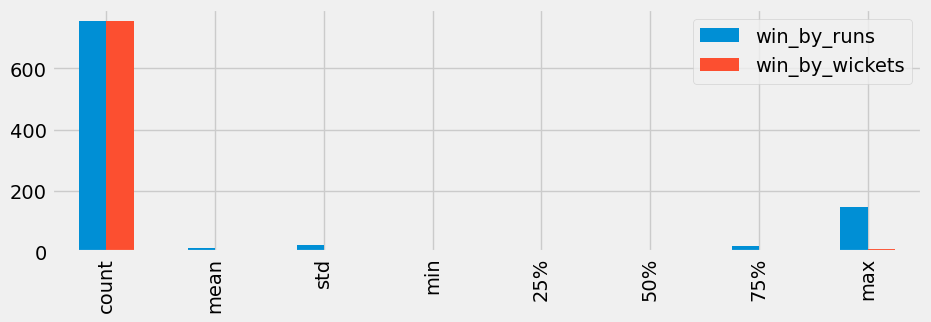

In [41]:
#Lets analyze the winning scores

print(matches[['win_by_runs', 'win_by_wickets']].describe())

plt.rcParams['figure.figsize'] = (10, 3) 
matches[['win_by_runs', 'win_by_wickets']].describe().plot(kind= "bar") 
plt.show()

In [45]:
#Lets check the Team who lost the Match by 146 Runs

matches[matches['win_by_runs'] == 146][['Season', 'team1', 'team2','winner','player_of_match']].reset_index(drop = True)

,Season,team1,team2,winner,player_of_match
0,IPL-2017,Mumbai Indians,Delhi Daredevils,Mumbai Indians,LMP Simmons


In [48]:
#Lets also check the Teams who lost the Match by all the 10 wickets
matches[matches['win_by_wickets'] == 10][['Season', 'team1', 'team2', 'winner','player_of_match']].reset_index(drop =True)

,Season,team1,team2,winner,player_of_match
0,IPL-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,CA Lynn
1,IPL-2017,Delhi Daredevils,Kings XI Punjab,Kings XI Punjab,Sandeep Sharma
2,IPL-2008,Mumbai Indians,Deccan Chargers,Deccan Chargers,AC Gilchrist
3,IPL-2009,Kings XI Punjab,Delhi Daredevils,Delhi Daredevils,DL Vettori
4,IPL-2010,Rajasthan Royals,Royal Challengers Bangalore,Royal Challengers Bangalore,JH Kallis
5,IPL-2011,Mumbai Indians,Rajasthan Royals,Rajasthan Royals,SR Watson
6,IPL-2012,Rajasthan Royals,Mumbai Indians,Mumbai Indians,DR Smith
7,IPL-2013,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,MEK Hussey
8,IPL-2015,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,VR Aaron
9,IPL-2016,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,B Kumar


In [53]:
matches[(matches['winner']=='Royal Challengers Bangalore') & ((matches['win_by_wickets'] > 7) | (matches['win_by_runs'] == 100))][['Season', 'team1', 'team2', 'win_by_wickets','win_by_runs']]

,Season,team1,team2,win_by_wickets,win_by_runs
142,IPL-2009,Mumbai Indians,Royal Challengers Bangalore,9,0
180,IPL-2010,Kings XI Punjab,Royal Challengers Bangalore,8,0
183,IPL-2010,Rajasthan Royals,Royal Challengers Bangalore,10,0
232,IPL-2010,Deccan Chargers,Royal Challengers Bangalore,9,0
257,IPL-2011,Kolkata Knight Riders,Royal Challengers Bangalore,9,0
282,IPL-2011,Kochi Tuskers Kerala,Royal Challengers Bangalore,9,0
287,IPL-2011,Rajasthan Royals,Royal Challengers Bangalore,9,0
301,IPL-2011,Chennai Super Kings,Royal Challengers Bangalore,8,0
359,IPL-2012,Mumbai Indians,Royal Challengers Bangalore,9,0
391,IPL-2013,Kolkata Knight Riders,Royal Challengers Bangalore,8,0


In [67]:
#Lets compare Mumbai Indians and Chennai Super Kings

MumbaiIndians= matches[(matches['team1'] =='Mumbai Indians') | (matches["team2"]=='Mumbai Indians')]
ChennaiSuperKings= matches[(matches['team1'] == 'Chennai Super Kings') | (matches['team2'] == 'Chennai Super Kings')] 
royalchallengers= matches[(matches['team1'] == 'Royal Challengers Bangalore') | (matches ['team2'] == 'Royal Challengers Bangalore')]

data = MumbaiIndians.append(ChennaiSuperKings)
data =data.append(royalchallengers)

data = data[ (data ['winner'] == 'Mumbai Indians') |(data['winner'] == 'Chennai Super Kings') |
(data['winner'] == 'Royal Challengers Bangalore')]

data[['Season', 'winner', 'win_by_runs', 'win_by_wickets','player_of_match']].groupby(['winner']).agg(['min', 'mean', 'max', 'sum']).style.background_gradient(cmap = 'inferno')

C:\Users\b sasank\AppData\Local\Temp\ipykernel_21708\1762460401.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = MumbaiIndians.append(ChennaiSuperKings)
C:\Users\b sasank\AppData\Local\Temp\ipykernel_21708\1762460401.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data =data.append(royalchallengers)
C:\Users\b sasank\AppData\Local\Temp\ipykernel_21708\1762460401.py:13: FutureWarning: ['Season', 'player_of_match'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  data[['Season', 'winner', 'win_by_runs', 'win_by_wickets','player_of_match']].groupby(['winner']).agg(['min', 'mean', 'max', 'sum']).style.background_gradient(cmap = 'inferno')


In [69]:
matches['result'].value_counts()

normal       743
tie            9
no result      4
Name: result, dtype: int64

In [72]:
#Lets check the Probability of Matches where we can see Normal, Tie or No Result scenarios

normal = matches[matches['result'] == 'normal'] 
tie = matches[matches['result'] == 'tie'] 
no_result = matches[matches['result'] == 'no result']


print("Percentage of matches where result is 'normal': ",round (normal.shape[0]/matches.shape[0],2) *100) 
print("Percentage of matches where result is 'tie': ",round(tie.shape[0]/matches.shape[0],2) *100) 
print("Percentage of matches where result is 'no result: ",round(no_result.shape[0]/matches.shape[0],2) *100)

Percentage of matches where result is 'normal':  98.0
Percentage of matches where result is 'tie':  1.0
Percentage of matches where result is 'no result:  1.0


In [74]:
#As we can see that there are only few Matches where Tie and No Result, so lets check them

print("Teams where Tie Happened") 
print (matches[matches['result'] == 'tie'][['date', 'team1', 'team2']].reset_index(drop = True))

print("\n")

print("Teams where there was No Result") 
print(matches[matches['result'] == 'no result'][['date', 'team1', 'team2']].reset_index(drop = True))

Teams where Tie Happened
         date                        team1                        team2
0  29-04-2017                Gujarat Lions               Mumbai Indians
1  23-04-2009             Rajasthan Royals        Kolkata Knight Riders
2  21-03-2010              Kings XI Punjab          Chennai Super Kings
3  07-04-2013  Royal Challengers Bangalore          Sunrisers Hyderabad
4  16-04-2013             Delhi Daredevils  Royal Challengers Bangalore
5  29-04-2014             Rajasthan Royals        Kolkata Knight Riders
6  21-04-2015             Rajasthan Royals              Kings XI Punjab
7  30-03-2019        Kolkata Knight Riders               Delhi Capitals
8  02-05-2019               Mumbai Indians          Sunrisers Hyderabad


Teams where there was No Result
         date                        team1                        team2
0  21-05-2011             Delhi Daredevils                Pune Warriors
1  29-04-2015  Royal Challengers Bangalore             Rajasthan Royals
2  17

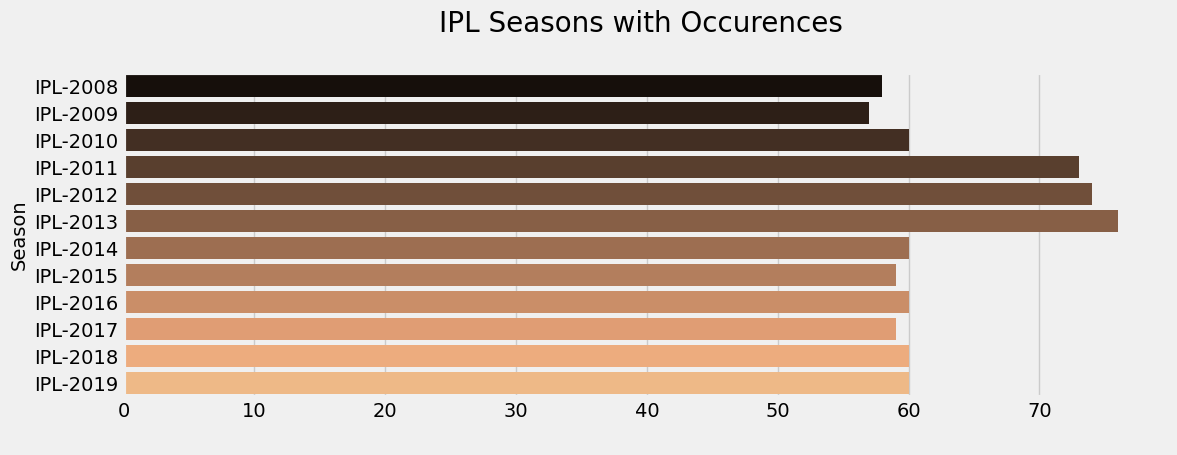

In [75]:
#Lets check the Number of IPL Seasons

plt.rcParams['figure.figsize'] = (12, 4) 
sns.countplot(y = matches['Season'].sort_values(), palette = 'copper') 
plt.title('IPL Seasons with Occurences \n', fontsize = 20) 
plt.xlabel(' ') 
plt.show()

C:\Users\b sasank\AppData\Local\Temp\ipykernel_21708\1813750138.py:3: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  team = matches['team1'].append(matches['team2'])


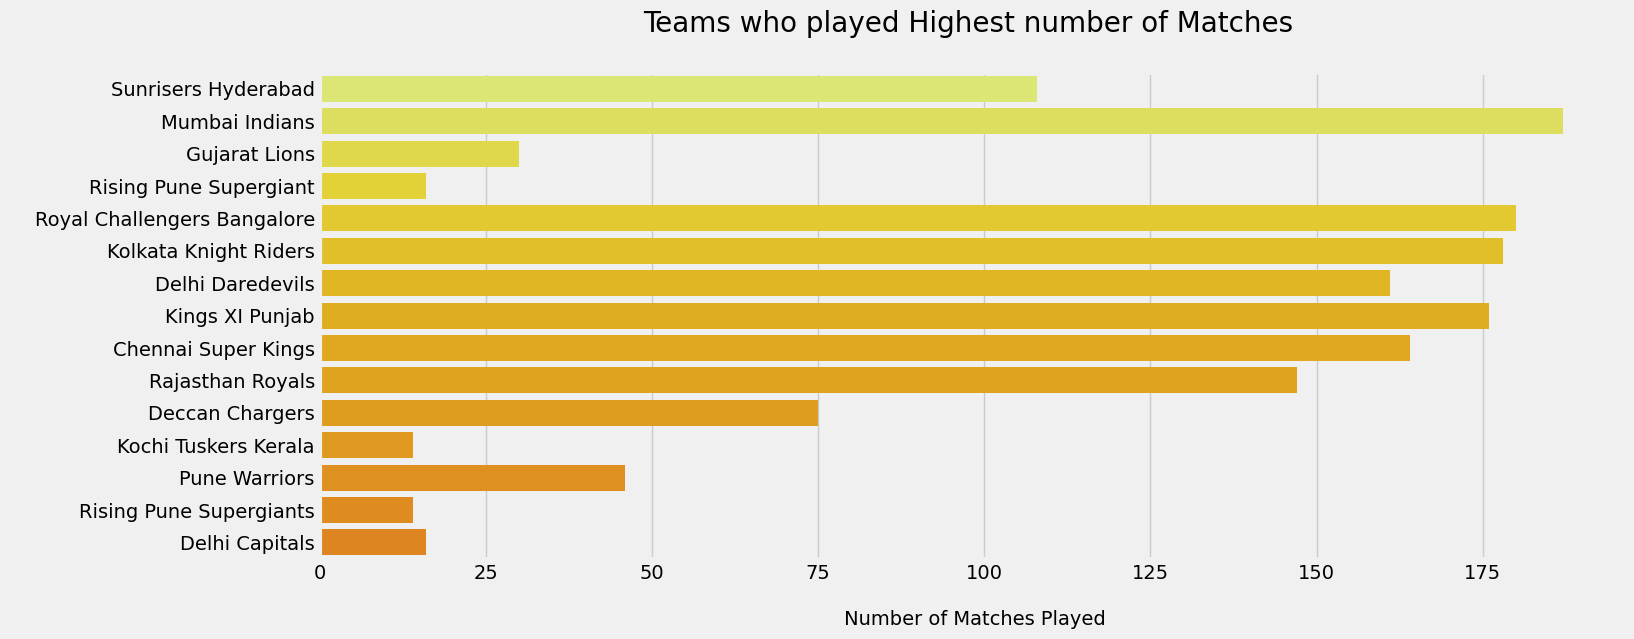

In [78]:
#Let's check the teams

team = matches['team1'].append(matches['team2'])

plt.rcParams['figure.figsize'] = (15, 6) 
sns.countplot (y = team, palette = 'Wistia')

plt.title('Teams who played Highest number of Matches \n', fontsize = 20)

plt.ylabel(' ')

plt.xlabel('\n Number of Matches Played')

plt.show()

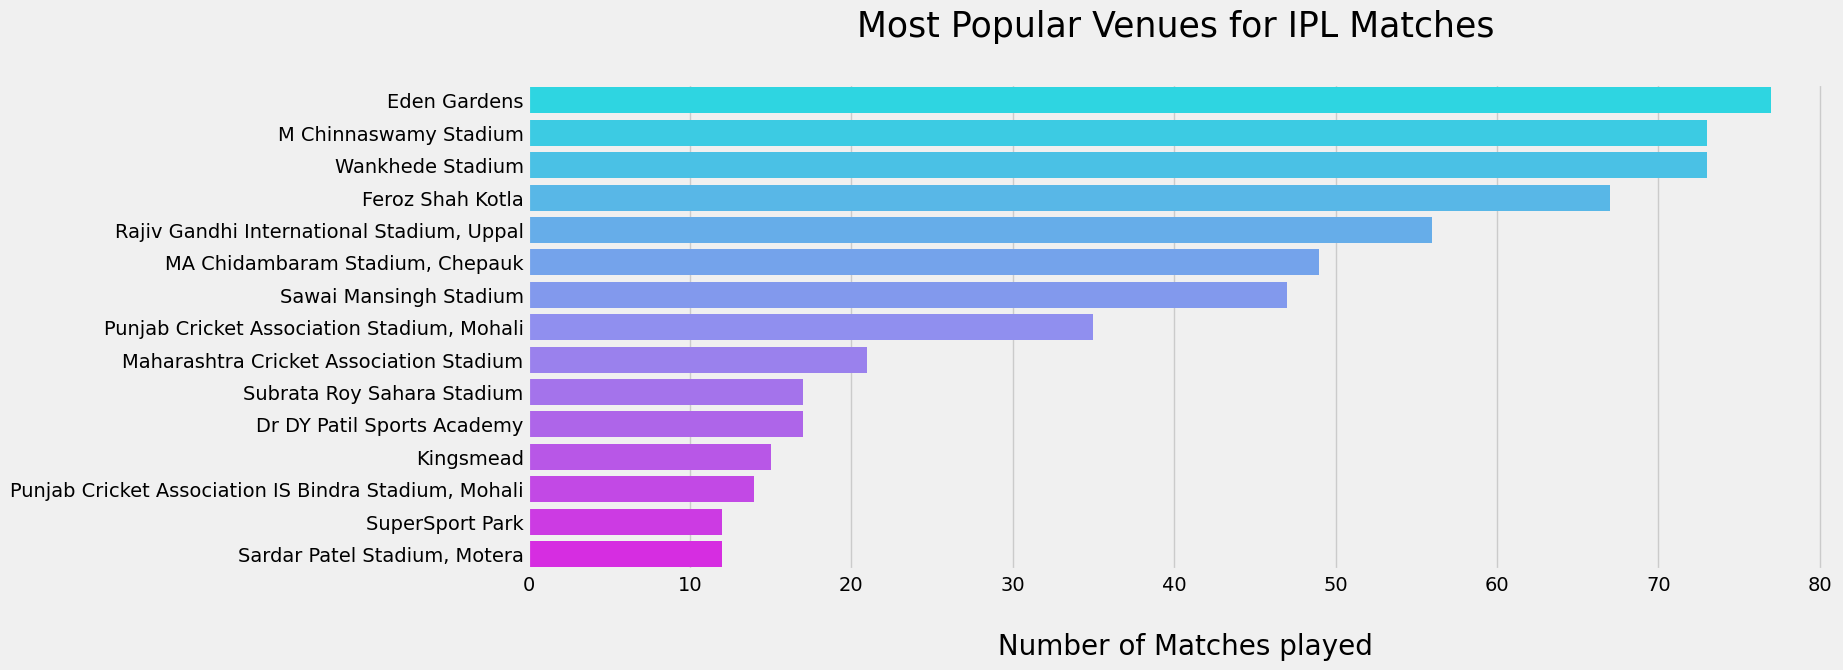

In [85]:
## Let explore the Vennues used for IPL Matches the Most

plt.rcParams['figure.figsize'] = (15, 6)



sns.barplot(y = matches['venue'].value_counts().head(15).index, 
            x = matches['venue'].value_counts().head(15).values, palette ='cool')
plt.xlabel('\n Number of Matches played', fontsize = 20) 

plt.title('Most Popular Venues for IPL Matches \n', fontsize = 25)
plt.show()

In [116]:
#lets find out in which cities the IPL matches were held out

def city(season):

    cities= matches.groupby([ 'Season', 'city'])['id'].agg('count').reset_index() 
    cities.rename(columns= {'id': 'count'}, inplace=True)

    return cities[cities['Season'] ==season].reset_index(drop =True).sort_values(by ='count', ascending=False)

#lets test it out with the IPL Season 2019 I
city('IPL-2017')


,Season,city,count
0,IPL-2017,Bengaluru,8
3,IPL-2017,Hyderabad,8
7,IPL-2017,Mumbai,8
2,IPL-2017,Delhi,7
6,IPL-2017,Kolkata,7
8,IPL-2017,Pune,7
9,IPL-2017,Rajkot,5
1,IPL-2017,Chandigarh,4
4,IPL-2017,Indore,3
5,IPL-2017,Kanpur,2


In [118]:
matches['winner'].value_counts()

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

In [124]:
#Lets analyze what is the Probability for a Team to win if they win the Toss

not_same =matches[matches['toss_winner'] != matches['winner']] 
same = matches[matches['toss_winner'] == matches['winner']]

print("Percentage of matches where toss winner is not same as winner: ",round(not_same.shape[0]/matches.shape[0], 4) * 100) 
print("Percentage of matches where toss winner is same as winner: ", round(same.shape[0]/matches.shape[0], 2) * 100)

Percentage of matches where toss winner is not same as winner:  48.02
Percentage of matches where toss winner is same as winner:  52.0


In [130]:
#teams who won when they won the Toss

def tosswin_wins (team):

    x= pd.crosstab(matches['toss_winner'], matches['winner']) 
    return x[[team]].sort_values(by= team, ascending =False).style.background_gradient(cmap= 'copper')

#Lets check this function with Mumbai Indians tosswin_wins ("Mumbai Indians')
tosswin_wins('Mumbai Indians')

winner,Mumbai Indians
toss_winner,
Mumbai Indians,56
Delhi Daredevils,9
Chennai Super Kings,7
Kolkata Knight Riders,7
Kings XI Punjab,6
Rajasthan Royals,6
Royal Challengers Bangalore,6
Deccan Chargers,4
Sunrisers Hyderabad,4


In [136]:
#Lets convert the above function into interactive

@interact

def tosswin_wins (team= matches['team1'].value_counts().index):
    x= pd.crosstab(matches['toss_winner'], matches['winner']) 
    return x[[team]].sort_values(by = team, ascending= False).style.background_gradient(cmap ='Oranges')                                                                                        

interactive(children=(Dropdown(description='team', options=('Mumbai Indians', 'Kings XI Punjab', 'Chennai Supe…

In [140]:
#Lets analyze all the locations where a Team won the Match

def teams_winning_location(team):

    x = matches[['winner', 'city']] 
    x = x[x['winner'] == team]

    return x['city'].value_counts()

#Lets do the testing for Mumbai Indians teams_winning location('Mumbai Indians')
teams_winning_location('Mumbai Indians')

Mumbai            53
Kolkata           10
Bengaluru          9
Hyderabad          7
Chennai            5
Pune               4
Chandigarh         4
Delhi              4
Jaipur             2
Visakhapatnam      2
Port Elizabeth     2
Indore             2
Centurion          1
East London        1
Cape Town          1
Rajkot             1
Ahmedabad          1
Name: city, dtype: int64

In [141]:
#It seems that Kolkata is lucky place for Mumbai. #Lets check How many Times Other IPL Teams have won in Kolkata

a = matches[matches['city'] == 'Kolkata'][['winner']]

a['winner'].value_counts().iloc[1:]

Mumbai Indians                 10
Chennai Super Kings             5
Royal Challengers Bangalore     4
Kings XI Punjab                 3
Gujarat Lions                   2
Rajasthan Royals                2
Sunrisers Hyderabad             2
Rising Pune Supergiant          1
Kochi Tuskers Kerala            1
Delhi Daredevils                1
Delhi Capitals                  1
Name: winner, dtype: int64

In [143]:
#Lets see the types of toss decisions 
matches['toss_decision'].value_counts()

field    463
bat      293
Name: toss_decision, dtype: int64

In [147]:
field= matches [matches['toss_decision'] == 'field'] 
bat=matches[matches['toss_decision']== 'bat']

print("Percentage of matches where toss decision is 'field': ",round (field.shape[0]/matches.shape[0],2) *100) 
print("Percentage of matches where toss decision is 'bat': ",round (bat.shape[0]/matches.shape[0],2) *100)

Percentage of matches where toss decision is 'field':  61.0
Percentage of matches where toss decision is 'bat':  39.0


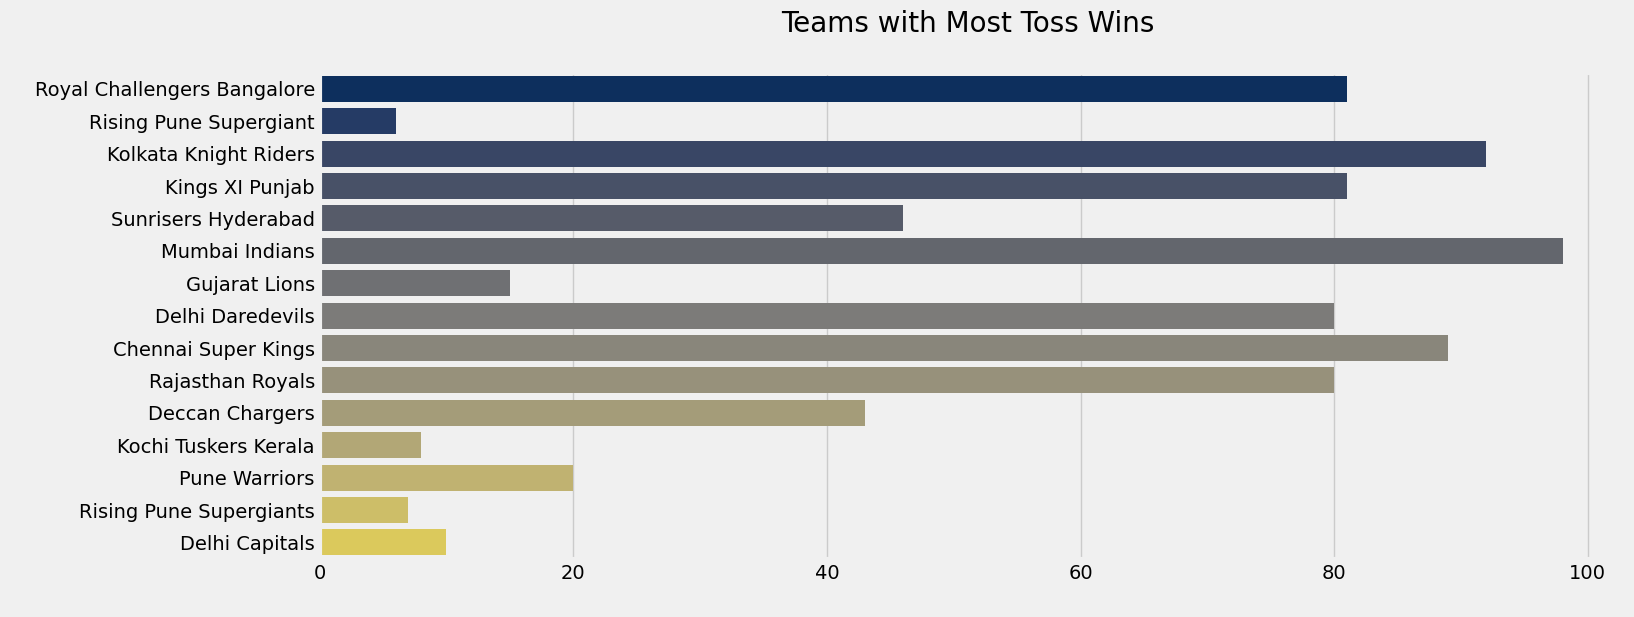

In [149]:
#Lets check How many times the IPL Teams won the Toss

sns.countplot(y = matches['toss_winner'], palette ='cividis')

plt.title('Teams with Most Toss Wins \n', fontsize=20)

plt.ylabel(' ')

plt.xlabel(' ')

plt.show()

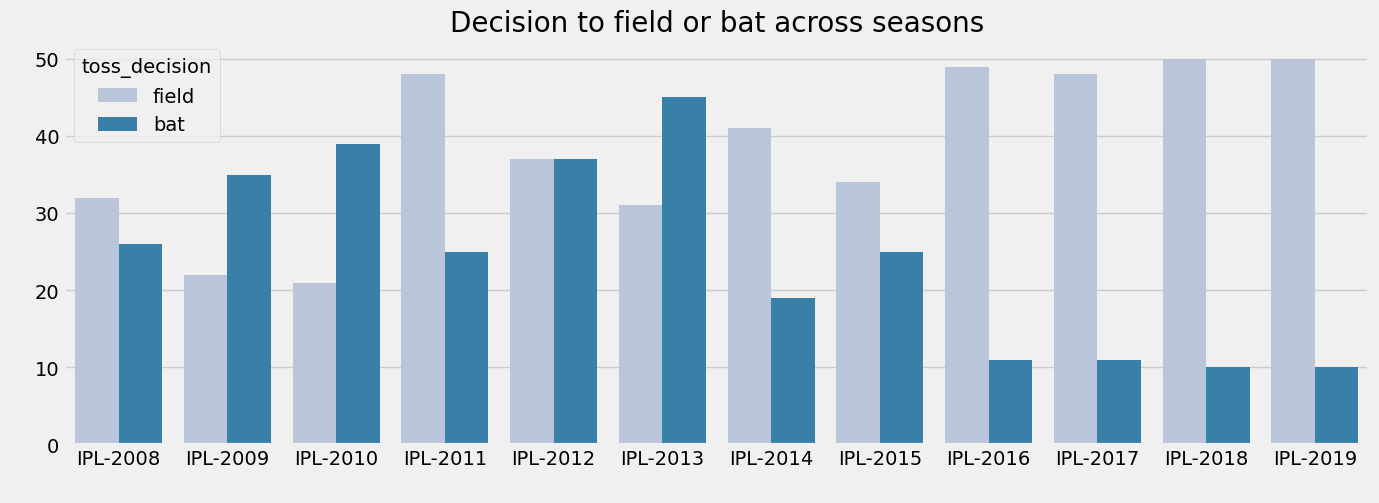

In [154]:
#Lets compare the Toss Decisions

plt.rcParams['figure.figsize'] = (15, 5)

sns.countplot(x=matches['Season'].sort_values(), hue =matches['toss_decision'], palette = "PuBu") 
plt.title("Decision to field or bat across seasons", fontsize = 20)

plt.xlabel(" ")

plt.ylabel(" ")

plt.show()

In [159]:
#Lets see How the IPL Teams decide, whether to field or to Bat

@interact

def toss_decision(team =list(matches['toss_winner'].value_counts().index)):

        x = matches[matches['toss_winner'] == team] 
        return x['toss_decision'].value_counts()

interactive(children=(Dropdown(description='team', options=('Mumbai Indians', 'Kolkata Knight Riders', 'Chenna…

In [166]:
#Lets check the Percentage of Matches where DL is applied

dl_applied_no= matches[matches['dl_applied'] == 0] 
dl_applied_yes=matches[matches['dl_applied']==1]

print("Percentage of matches where DL is applied: ",round(dl_applied_yes.shape[0]/matches.shape[0],2) *100)
print("Percentage of matches where DL is not applied: ",round(dl_applied_no.shape[0]/matches.shape[0],2) *100)

Percentage of matches where DL is applied:  3.0
Percentage of matches where DL is not applied:  97.0


In [167]:
#Lets check the winner of those Matches where DL is applied

a = matches [matches['dl_applied'] ==1]

a['winner'].value_counts()

Kolkata Knight Riders          4
Royal Challengers Bangalore    3
Kings XI Punjab                2
Chennai Super Kings            2
Delhi Daredevils               2
Sunrisers Hyderabad            2
Rising Pune Supergiants        2
Kochi Tuskers Kerala           1
Rajasthan Royals               1
Name: winner, dtype: int64

In [168]:
#Lets also check the complete deta of those Matches where DL is applied

matches[matches['dl_applied'] == 1][['Season', 'team1', 'team2', 'winner']]

,Season,team1,team2,winner
56,IPL-2017,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders
99,IPL-2008,Delhi Daredevils,Kings XI Punjab,Kings XI Punjab
102,IPL-2008,Kolkata Knight Riders,Chennai Super Kings,Chennai Super Kings
119,IPL-2009,Kings XI Punjab,Delhi Daredevils,Delhi Daredevils
122,IPL-2009,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders
148,IPL-2009,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings
251,IPL-2011,Chennai Super Kings,Kochi Tuskers Kerala,Kochi Tuskers Kerala
280,IPL-2011,Chennai Super Kings,Kolkata Knight Riders,Kolkata Knight Riders
290,IPL-2011,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore
488,IPL-2014,Delhi Daredevils,Sunrisers Hyderabad,Sunrisers Hyderabad
